<a href="https://colab.research.google.com/github/NEERAJGUPTA11/Banking-System/blob/main/Malaria_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importng Libraries

In [10]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image


In [11]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras import Sequential, backend, optimizers


Unzipping Dataset

In [12]:
from zipfile import ZipFile
file_name='/content/Dataset (3).zip'
with ZipFile(file_name,'r') as zip:
          zip.extractall()

Identifying Dependent and Independent Objects

In [13]:
parasitized_data = os.listdir('/content/Dataset/Train/parasite-uneffected')
uninfected_data = os.listdir('/content/Dataset/Train/resized-uneffected')
data = []
labels = []

for img in parasitized_data:
    try:
        img_read = plt.imread('/content/Dataset/Train/parasite-uneffected/' + img)  # Add '/' here
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None

for img in uninfected_data:
    try:
        img_read = plt.imread('/content/Dataset/Train/resized-uneffected/' + img)  # Add '/' here
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None


image_data = np.array(data)
labels = np.array(labels)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_data: 416
labels: 416


Data Visualization

Parasitized Sample:



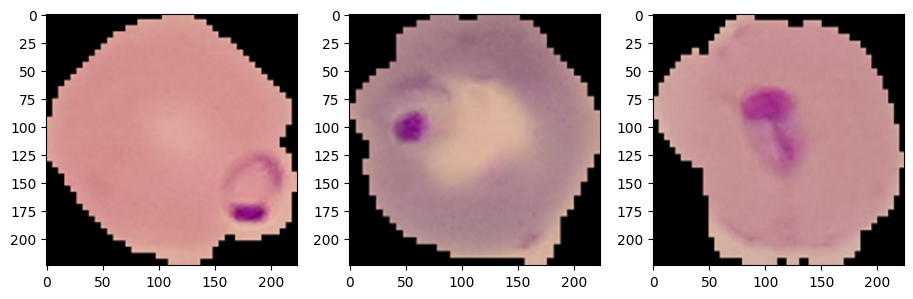

Uninfected Sample:



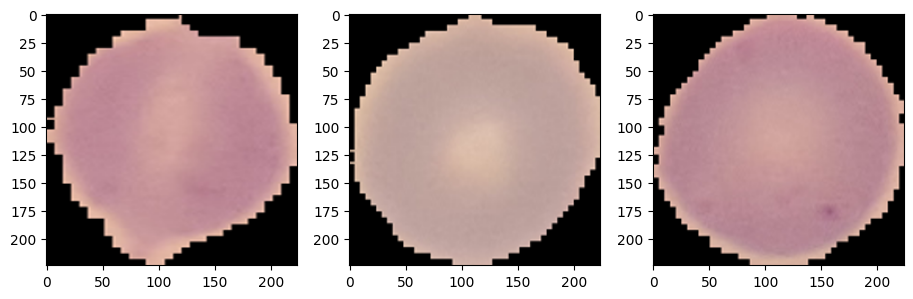

In [14]:
print("Parasitized Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/content/Dataset/Train/parasite-uneffected/' + parasitized_data[i])  # Add '/' here
    if img is not None:  # Check if the image was loaded properly
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display in matplotlib
    else:
        print(f"Error loading image: {parasitized_data[i]}")
plt.show()

print("Uninfected Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/content/Dataset/Train/resized-uneffected/' + uninfected_data[i])  # Add '/' here
    if img is not None:  # Check if the image was loaded properly
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display in matplotlib
    else:
        print(f"Error loading image: {uninfected_data[i]}")
plt.show()


Dividng into train and test

In [16]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming `image_data` and `labels` are already defined as arrays
# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=0)

# Step 2: Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Print lengths to verify
print("X_train:", len(X_train))
print("X_test:", len(X_test))
print("y_train:", len(y_train))
print("y_test:", len(y_test))


X_train: 332
X_test: 84
y_train: 332
y_test: 84


Building the CNN model

In [18]:
model = Sequential()

inputShape = (50, 50, 3)

if backend.image_data_format() == 'channels_first':
          inputShape = (3, 50, 50)
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 285,506 (1.09 MB)

 Trainable params: 284,290 (1.08 MB)

 Non-trainable params: 1,216 (4.75 KB)

Compiling the model

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Fitting the model

In [22]:
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.9950 - loss: 0.0304 - val_accuracy: 0.7619 - val_loss: 1.5437
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.7857 - val_loss: 0.9282
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 1.0000 - loss: 0.0107 - val_accuracy: 0.8333 - val_loss: 0.7418
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9995 - loss: 0.0122 - val_accuracy: 0.8690 - val_loss: 0.4820
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9977 - loss: 0.0103 - val_accuracy: 0.7143 - val_loss: 1.4969
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9833 - loss: 0.0378 - val_accuracy: 0.8452 - val_loss: 0.6952
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9927 - loss: 0.0153 - val_accuracy: 0.5952 - val_loss: 1.9049
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9945 - loss: 0.0135 - val_accuracy: 

Evaluating the model

In [21]:
predict = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7874 - loss: 1.2001
Loss:  1.2864502668380737
Accuracy:  78.57142686843872


In [35]:
from keras.preprocessing import image
img_path = '/content/Dataset/Test/parasite-resized/C39P4thinF_original_IMG_20150622_105554_cell_16.png'
img = image.load_img(img_path, target_size=(50, 50))


In [36]:

# Convert image to array and scale it (if needed)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize if your model was trained with normalized data


predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the class with highest probability

# Interpret the prediction
if predicted_class == 0:
    print("Predicted: Uninfected")
else:
    print("Predicted: Infected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted: Infected


Saving model